In [1]:
import os
import numpy as np
import random
import glob
import math
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

In [3]:
plt.style.use("bmh")

# -- set grayscale to be the default color map 
# plt.rcParams["image.cmap"] = "gist_gray"
plt.rcParams["axes.grid"] = False
plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams['axes.titlepad'] = 0 

In [4]:
# def create_source_locations(bimg, seed):
#     """
#     Create locations for sources
#     """

#     # -- seed the random number generators
#     np.random.seed(seed)
    
#     # -- get the code for each building 
#     bcodes = np.unique(bimg)

#     # -- initialize location lists/arrays
#     location = []
    
#     # -- since code == 0 represents the background, we start from 1
#     for i, bcode in enumerate(bcodes):

#         # -- ignore background
#         if bcode == 0:
#             continue
        
#         # -- alert the user
#         if (i + 1) % 100 == 0:
#             print("working on {0} of {1}\r".format(i + 1, len(bcodes)), end="")
        
#         # -- get pixels' location for each building (ind[0] is the row value and ind[1] is the col value)
#         ind = np.where(bimg == bcode)
    
#         # -- get locations for selected sources
#         loc = np.array(ind).T
    
#         # -- shuffle it
#         np.random.shuffle(loc)
    
#         # -- select sources for every 100 pixels
#         pix_loc = loc[::100]
    
#         location.append(np.array(pix_loc)) 
    
#     return np.concatenate(location)

In [5]:
# def create_timeseries(nsrc, ntimesteps, seed):
#     """
#     Create simulated time series.
#     """
    
#     # -- seed the random number generators
#     np.random.seed(seed)

#     # -- initialize time series lists/arrays
#     srcs = []
#     src_tmp = np.zeros(ntimesteps)
        
#     # -- add brightness for each source
#     for j in range(nsrc):

#         # -- alert the user
#         if (j + 1) % 100 == 0:
#             print("working on {0} of {1}\r".format(j + 1, nsrc), end="")
        
#         # -- we assume that each source will turn on and off no more than 10 times a night
#         # -- generate a random number for lights on
#         n_ons = np.random.randint(1, 10)
 
#         # -- add brightness for each "on" period
#         for jj in range(0, n_ons):
            
#             # -- pick a random start point (0-1800), which is 9pm to 2am
#             st = np.random.randint(0, 1800)
            
#             # -- the length of turning on the lights is between 10 mins to 1hours
#             en = st + np.random.randint(60, 360)
                        
#             # -- generate random brightness value to my list
#             on_lum = round(np.random.uniform(0.1, 1.0), 2)

#             # -- add this to the source
#             src_tmp[st:en] += on_lum
            
#         # -- append to source list
#         srcs.append(src_tmp.copy())
            
#         # -- re-zero source
#         src_tmp[:] = 0.0
    
#     return np.array(srcs)

In [6]:
# # -- create time series images for a month
# seed_loc = 315
# seed_ts = 964

# # -- set number of time steps (9 hours assuming 10 seconds / image )
# ntsteps = 6 * 60 * 9

# for i in range(30):
    
#     seed_ts = seed_ts + 1
    
#     # -- get the locations
#     loc_fname = "../../lighting-tech-changeover/output/simulation_month/img_simu_loc_{0:06}.npy".format(seed_loc)

#     if os.path.isfile(loc_fname):
#         loc = np.load(loc_fname)
#     else:
#         print(loc_fname + " not found... creating source locations")
#         loc = create_source_locations(bimg, seed_loc)
#         np.save(loc_fname, loc)

#     # -- get the corresponding time series
#     ts_fname = "../../lighting-tech-changeover/output/simulation_month/img_simu_src_curve_{0:06}.npy".format(seed_ts)

#     if os.path.isfile(ts_fname):
#         srcs = np.load(ts_fname)
#     else:
#         print(ts_fname + " not found... creating source times series")
#         srcs = create_timeseries(len(loc), ntsteps, seed_ts)
#         np.save(ts_fname, srcs)
    
               
    

In [4]:
seed_loc = 315
# -- get the locations
loc_fname = "../../lighting-tech-changeover/output/simulation_month/img_simu_loc_{0:06}.npy".format(seed_loc)

loc = np.load(loc_fname)

seed_ts = 964
ts_fname = "../../lighting-tech-changeover/output/simulation_month/img_simu_src_curve_{0:06}.npy".format(seed_ts)
srcs = np.load(ts_fname)

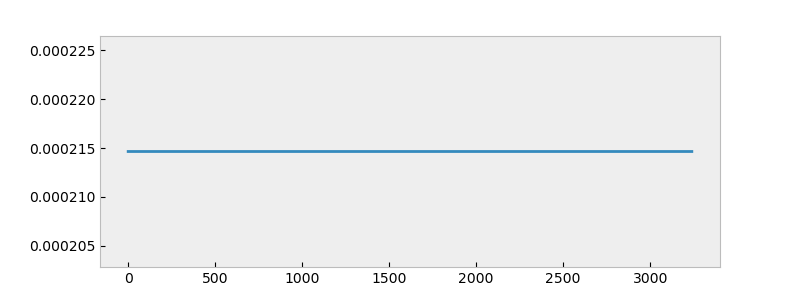

In [8]:
plt.figure(figsize=(8, 3))
plt.plot(img_bin_noise[0,0,:])

In [7]:

    
    seed_loc = 315
    # -- get the locations
    loc_fname = "../../lighting-tech-changeover/output/simulation_month/img_simu_loc_{0:06}.npy".format(seed_loc)

    loc = np.load(loc_fname)


In [8]:
# -- read in building ID image
bimg = np.load("../../Downloads/bbls_test.npy")

def create_bin_img(srcs):
    


    # -- duplicate each light curve by nine times
    src0 = np.repeat(srcs, repeats=9, axis=0)

    # -- get full list of source location
    loc_new = []
    for i in range(len(loc)):
        loc0 = (loc[i][0] + 1, loc[i][1])
        loc1 = (loc[i][0] - 1, loc[i][1])
        loc2 = (loc[i][0], loc[i][1])
        loc3 = (loc[i][0], loc[i][1] + 1)
        loc4 = (loc[i][0], loc[i][1] - 1)
        loc5 = (loc[i][0] - 1, loc[i][1] - 1)
        loc6 = (loc[i][0] - 1, loc[i][1] + 1)
        loc7 = (loc[i][0] + 1, loc[i][1] - 1)
        loc8 = (loc[i][0] + 1, loc[i][1] + 1)
    
    
        loc_new.append(loc0)
        loc_new.append(loc1)
        loc_new.append(loc2)
        loc_new.append(loc3)
        loc_new.append(loc4)
        loc_new.append(loc5)
        loc_new.append(loc6)
        loc_new.append(loc7)
        loc_new.append(loc8)

    # -- add sources curve to time series images (try/except to handle boundaries)
    t0 = time.time()
    imgs = np.zeros((2560, 1920, 3240))
    print(time.time() - t0)
    for i in range(len(loc_new)):
        try:
            imgs[loc_new[i][0], loc_new[i][1], :] = src0[i]
        except:
            continue

    
    return imgs

In [9]:
    seed_ts = 972
    seed_noise = 347

    
    
    # -- get the corresponding time series
    ts_fname = "../../lighting-tech-changeover/output/simulation_month/img_simu_src_curve_{0:06}.npy".format(seed_ts)
    srcs = np.load(ts_fname)
    
    imgs = create_bin_img(srcs)

    # -- add noise to the image
    sh = imgs.shape
    
#     seed_noise = seed_noise+1
    avg = 0
    sigma = 0.01

    np.random.seed(seed_noise)

    # -- add noise to binned image
    for i in range(3240):
    
        imgs[:, :, i] = imgs[:, :, i] + \
            np.random.normal(avg, sigma, (sh[0], sh[1]))

    # -- get selected builing's source
    ind = np.where(bimg == 1008310042)
    buid_loc = np.array([ind[0],ind[1]]).T   

    src_lc = []
    for i in range(len(buid_loc)):
        lc = imgs[buid_loc[i][0], buid_loc[i][1], :]
        src_lc.append(lc)


    np.save("../../lighting-tech-changeover/output/src_month_build/src_curve_month{0:06}.npy".format(seed_ts), src_lc)

1.3113021850585938e-05


In [2]:
seed_ts = 964

In [3]:
 test = np.load("../../lighting-tech-changeover/output/src_month_build/src_curve_month{0:06}.npy".format(seed_ts))

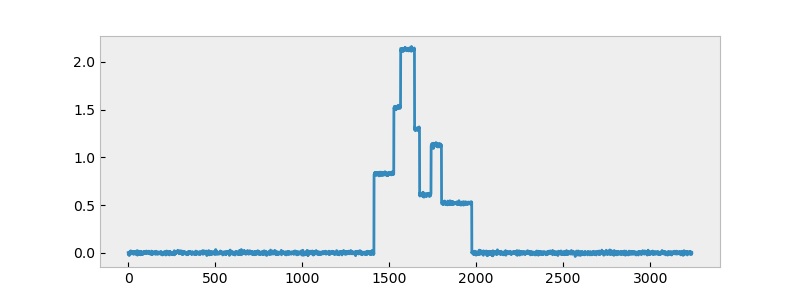

In [11]:
plt.figure(figsize=(8, 3))
plt.plot(imgs[buid_loc[300][0], buid_loc[300][1], :])

In [66]:
test0 = imgs[buid_loc[300][0], buid_loc[300][1], :]

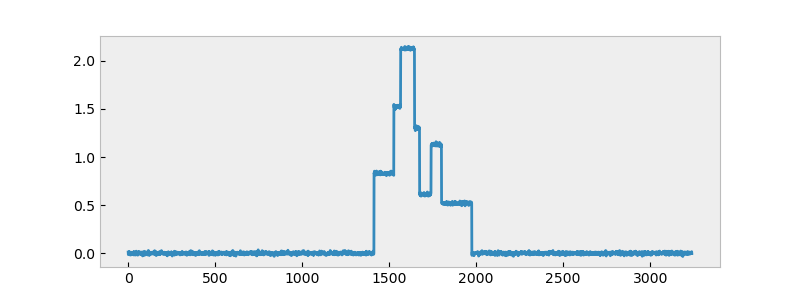

In [62]:
plt.figure(figsize=(8, 3))
plt.plot(imgs[buid_loc[300][0], buid_loc[300][1], :])

In [45]:
build_src = []

for i in range(len(buid_loc)):
    src = imgs[buid_loc[i][0], buid_loc[i][1], :]
    build_src.append(src)

np.save("../../lighting-tech-changeover/output/src_month_build/src_curve_month{0:06}.npy".format(seed_ts))
    

308

In [5]:
def add_noise(imgs, noise=None):
    """
    Bin sequence of images (nrow,ncol,ntsteps) and add noise if desired.
    If adding noise, set noise kw to be a tuple of (seed, mean, sigma[unbinned])
    """
    
    sh = imgs.shape
    

    # -- add gaussian noise
    seed_noise, avg, sigma = noise
    
    np.random.seed(seed_noise)

    # -- add noise to binned image

    for i in range(3240):
        imgs[:, :, i] = imgs[:, :, i] + \
            np.random.normal(avg, sigma, (sh[0], sh[1]))
        
    return imgs

In [ ]:
1008310042

In [9]:
# We already have sources' time-series light-curve for a month
# Now I would like to calculate it's time series mean value for a given building